In [1]:
import pandas as pd
import numpy as np

# Read the CSV file into a DataFrame
df = pd.read_csv('Ice_cream selling data.csv')

# Display the DataFrame
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


This is a non linear example for regression. this graph should follow this equation b*x^^2

<Axes: title={'center': 'Ice cream sales scatter plot'}, xlabel='Temperature (°C)', ylabel='Ice Cream Sales (units)'>

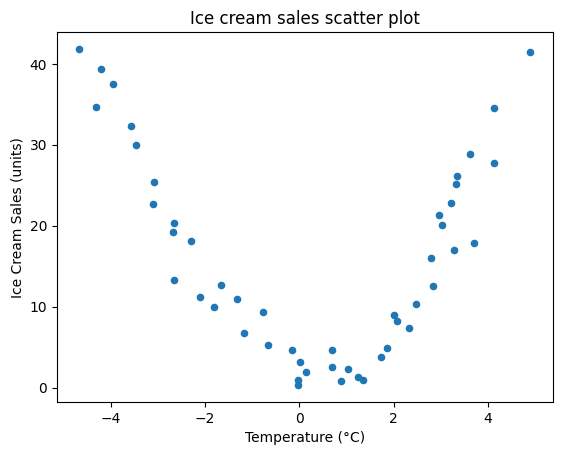

In [2]:
df.plot(kind='scatter', x='Temperature (°C)', y='Ice Cream Sales (units)', title='Ice cream sales scatter plot')

We will scale the columns of the datafram between -1 and 1 using numpy, keep in mind it can be done by sklean

In [3]:
def scale_column_minus1_to_1(col):
    min_val = np.min(col)
    max_val = np.max(col)
    scaled_col = 2 * (col - min_val) / (max_val - min_val) - 1
    return scaled_col

def scale_column_0_to_1(col):
    min_val = np.min(col)
    max_val = np.max(col)
    scaled_col = (col - min_val) / (max_val - min_val)
    return scaled_col

In [4]:

df['Scaled Temperature (°C)'] = scale_column_minus1_to_1(df['Temperature (°C)'])
df['Scaled Ice Cream Sales (units)'] = scale_column_0_to_1(df['Ice Cream Sales (units)'])

df.head()

,Temperature (°C),Ice Cream Sales (units),Scaled Temperature (°C),Scaled Ice Cream Sales (units)
0,-4.662263,41.842986,-1.000000,1.000000
1,-4.316559,34.661120,-0.927687,0.827003
2,-4.213985,39.383001,-0.906231,0.940744
3,-3.949661,37.539845,-0.850940,0.896346
4,-3.578554,32.284531,-0.773313,0.769755


<Axes: title={'center': 'Ice cream sales scatter plot'}, xlabel='Scaled Temperature (°C)', ylabel='Scaled Ice Cream Sales (units)'>

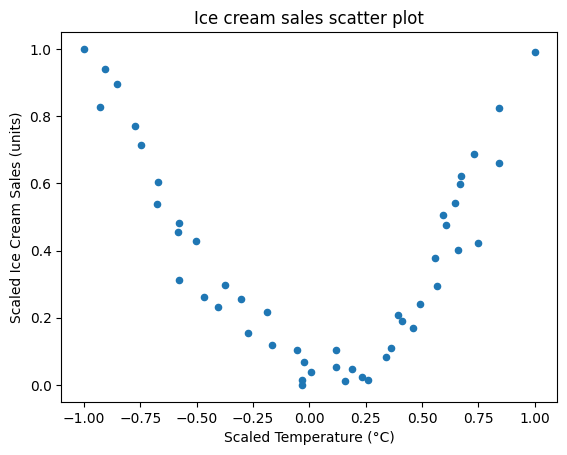

In [5]:
df.plot(kind='scatter', x='Scaled Temperature (°C)', y='Scaled Ice Cream Sales (units)', title='Ice cream sales scatter plot')

Creating the Equation, Cost Function, and Gradient Descent Equation

###### the actual equal should follow y = (w * X^^2)+b


In [6]:
def polynomial_equation(X, b, w):
    return w * (X**2) + b

In [7]:
def cost_function(X, y, b, w):
    m = len(y)
    J = 1/(2*m) * np.sum((polynomial_equation(X, b, w) - y) ** 2)
    return J

In [8]:
def gradent_descent(X, y, b, w, learning_rate, num_iters):
    m = len(y)
    J_history = np.zeros(num_iters)
    for i in range(num_iters):
        predictions = polynomial_equation(X, b, w)
        w = w - learning_rate * ( (2 / m) * np.sum((predictions - y) * (X**2)) )
        b = b - learning_rate * ( (2 / m) * np.sum((predictions - y)))
        J_history[i] = cost_function(X, y, b, w)
        print('the cost for iteration', i + 1, 'is: ', J_history[i])
    return b, w, J_history

Running the polynomial regression

In [9]:
X = df['Scaled Temperature (°C)']
y = df['Scaled Ice Cream Sales (units)']
original_x = df['Temperature (°C)']
original_y = df['Ice Cream Sales (units)']

b, w, J_history = gradent_descent(X, y, 0, 0, 0.5, 100)
print('b:', b)
print('w:', w)  

the cost for iteration 1 is:  0.030877229643748793
the cost for iteration 2 is:  0.02642588689963883
the cost for iteration 3 is:  0.023310296328284522
the cost for iteration 4 is:  0.020620016087908644
the cost for iteration 5 is:  0.01829000279413823
the cost for iteration 6 is:  0.016271933972603906
the cost for iteration 7 is:  0.014524045331157186
the cost for iteration 8 is:  0.01301016498698691
the cost for iteration 9 is:  0.011698963779825109
the cost for iteration 10 is:  0.010563306914812698
the cost for iteration 11 is:  0.009579692418421612
the cost for iteration 12 is:  0.008727764774326303
the cost for iteration 13 is:  0.007989893673974797
the cost for iteration 14 is:  0.007350809164266093
the cost for iteration 15 is:  0.006797285641858117
the cost for iteration 16 is:  0.0063178681544923425
the cost for iteration 17 is:  0.0059026353452483185
the cost for iteration 18 is:  0.005542994133952378
the cost for iteration 19 is:  0.0052315018867528035
the cost for iteratio

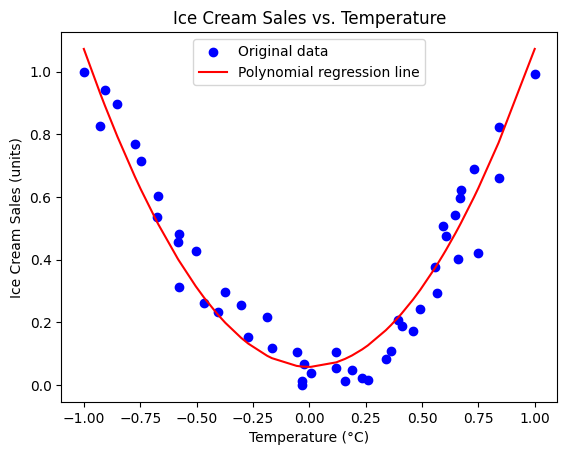

In [10]:
import matplotlib.pyplot as plt
# Plot the original data points
plt.scatter(X, y, color='blue', label='Original data')

# Plot the linear regression line
regression_line = polynomial_equation(X, b, w)
plt.plot(X, regression_line, color='red', label='Polynomial regression line')

# Add labels and title
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.title('Ice Cream Sales vs. Temperature')
plt.legend()

# Show the plot
plt.show()

In [12]:
# New temperature value for prediction
new_temperature = 2  # Example temperature value

# Make prediction
predicted_sales = polynomial_equation(new_temperature, b, w)
print(f'Predicted ice cream sales for temperature {new_temperature}°C: {predicted_sales}')  

Predicted ice cream sales for temperature 2°C: 4.117628454788532
